# 1. Load and Preprocess Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    """Loads the diabetes dataset from the specified file path."""
    dataset = pd.read_csv('/content/diabetes.csv')
    return dataset

def preprocess_data(dataset):
    """
    Preprocesses the diabetes dataset:
    - Replaces zero values with NaN.
    - Fills NaN values with the mean.
    - Scales the data using MinMaxScaler.
    - Selects features 'Glucose', 'Insulin', 'BMI', and 'Age'.
    - Returns the features (X) and the target variable (Y).
    """
    print("Starting preprocess_data...")

    # Replacing zero values with NaN
    print("Replacing zeros with NaN...")
    dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)
    print("Zeros replaced.")

    # Filling NaN with mean values
    print("Filling NaN values...")
    dataset["Glucose"] = dataset["Glucose"].fillna(dataset["Glucose"].mean())
    dataset["BloodPressure"] = dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean())
    dataset["SkinThickness"] = dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean())
    dataset["Insulin"] = dataset["Insulin"].fillna(dataset["Insulin"].mean())
    dataset["BMI"] = dataset["BMI"].fillna(dataset["BMI"].mean())
    print("NaN values filled.")

    # Feature scaling using MinMaxScaler
    print("Scaling data...")
    sc = MinMaxScaler(feature_range=(0, 1))
    dataset_scaled = sc.fit_transform(dataset.values)
    dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)
    print("Data scaled.")

    # Selecting features - [Glucose, Insulin, BMI, Age]
    print("Selecting features...")
    X = dataset_scaled[["Glucose", "Insulin", "BMI", "Age"]]
    Y = dataset_scaled["Outcome"]
    print("Features selected.")

    print("Ending preprocess_data.")
    return X, Y

# --- Main Execution ---
print("Starting...")

file_path = 'diabetes.csv'
raw_data = load_data(file_path)
X, Y = preprocess_data(raw_data)

# --- Data Splitting ---
print("\nSplitting data into training and testing sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)
print("Data split.")

print("\nShape of X after preprocessing and splitting:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

print("\nX_train head:")
print(X_train.head())

print("\nY_train head:")
print(Y_train.head())

print("Ending...")

Starting...
Starting preprocess_data...
Replacing zeros with NaN...
Zeros replaced.
Filling NaN values...
NaN values filled.
Scaling data...
Data scaled.
Selecting features...
Features selected.
Ending preprocess_data.

Splitting data into training and testing sets...
Data split.

Shape of X after preprocessing and splitting:
X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)

X_train head:
      Glucose   Insulin       BMI       Age
353  0.296774  0.034856  0.184049  0.050000
711  0.529032  0.009615  0.233129  0.316667
373  0.393548  0.096154  0.341513  0.066667
46   0.658065  0.170130  0.235174  0.133333
682  0.329032  0.109375  0.539877  0.016667

Y_train head:
353    0.0
711    0.0
373    0.0
46     0.0
682    0.0
Name: Outcome, dtype: float64
Ending...


# 2 Data Visualization

Starting preprocess_data...
Replacing zeros with NaN...
Zeros replaced.
Filling NaN values...
NaN values filled.
Scaling data...
Data scaled.
Selecting features...
Features selected.
Ending preprocess_data.
Starting data visualization...


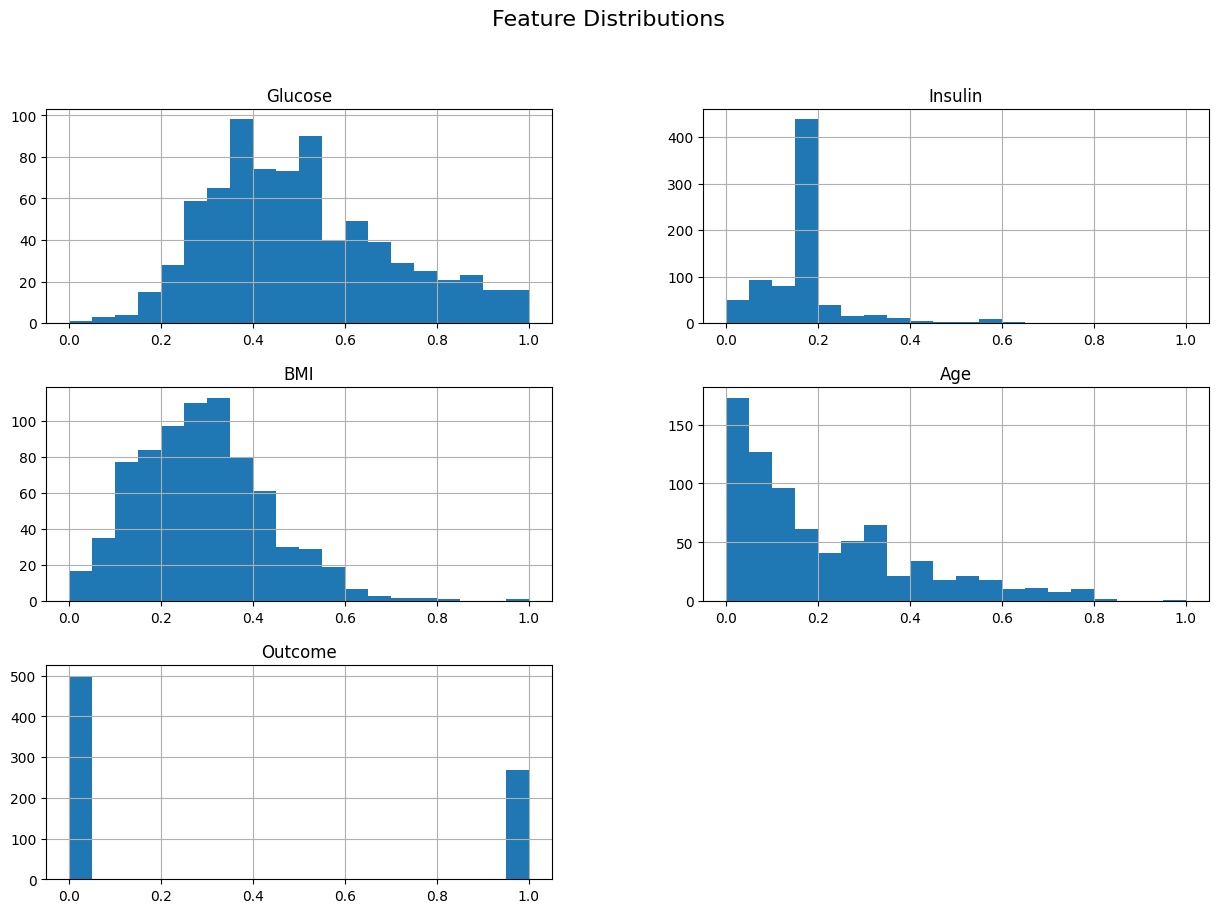

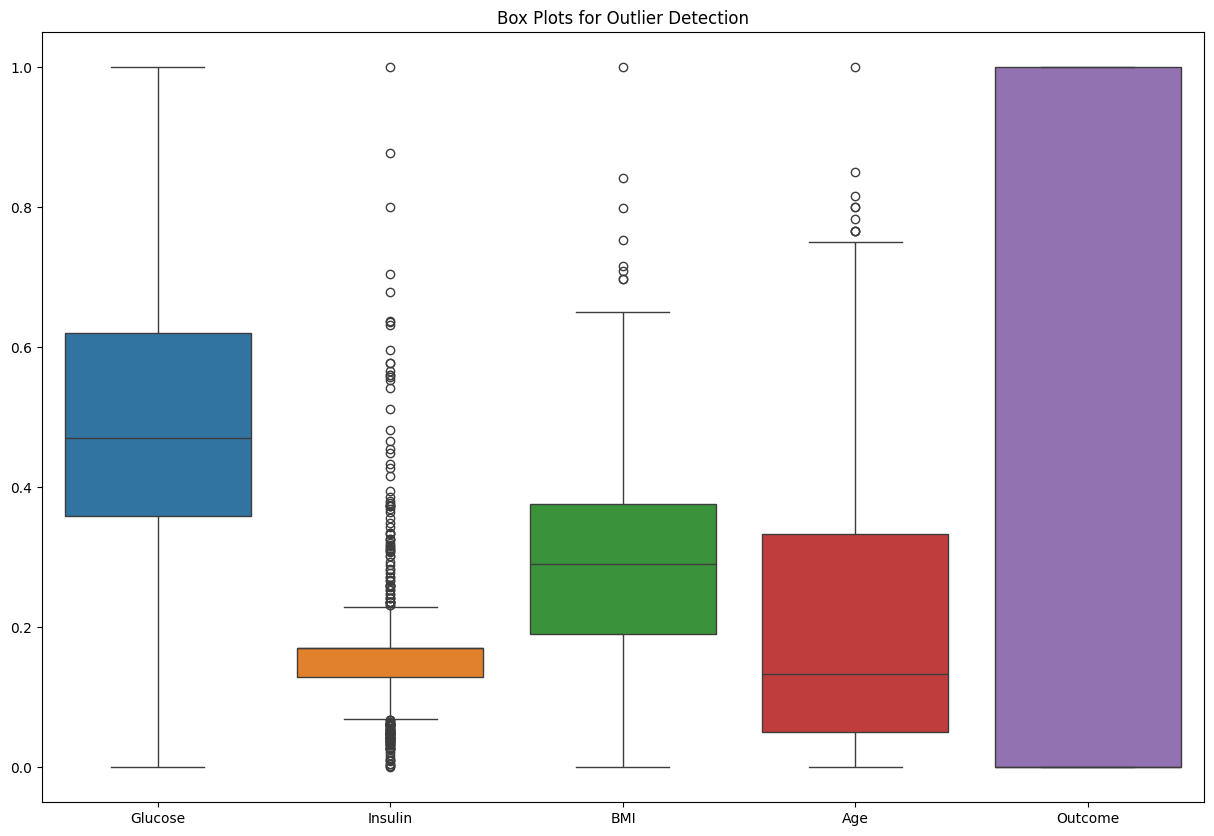

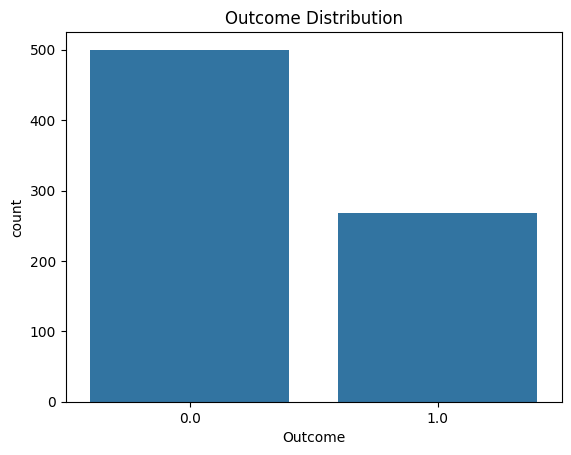

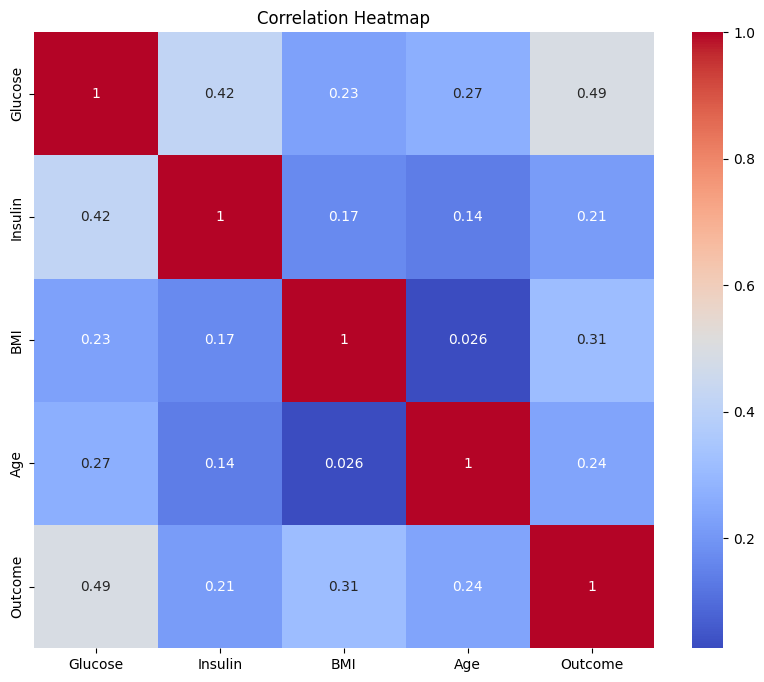

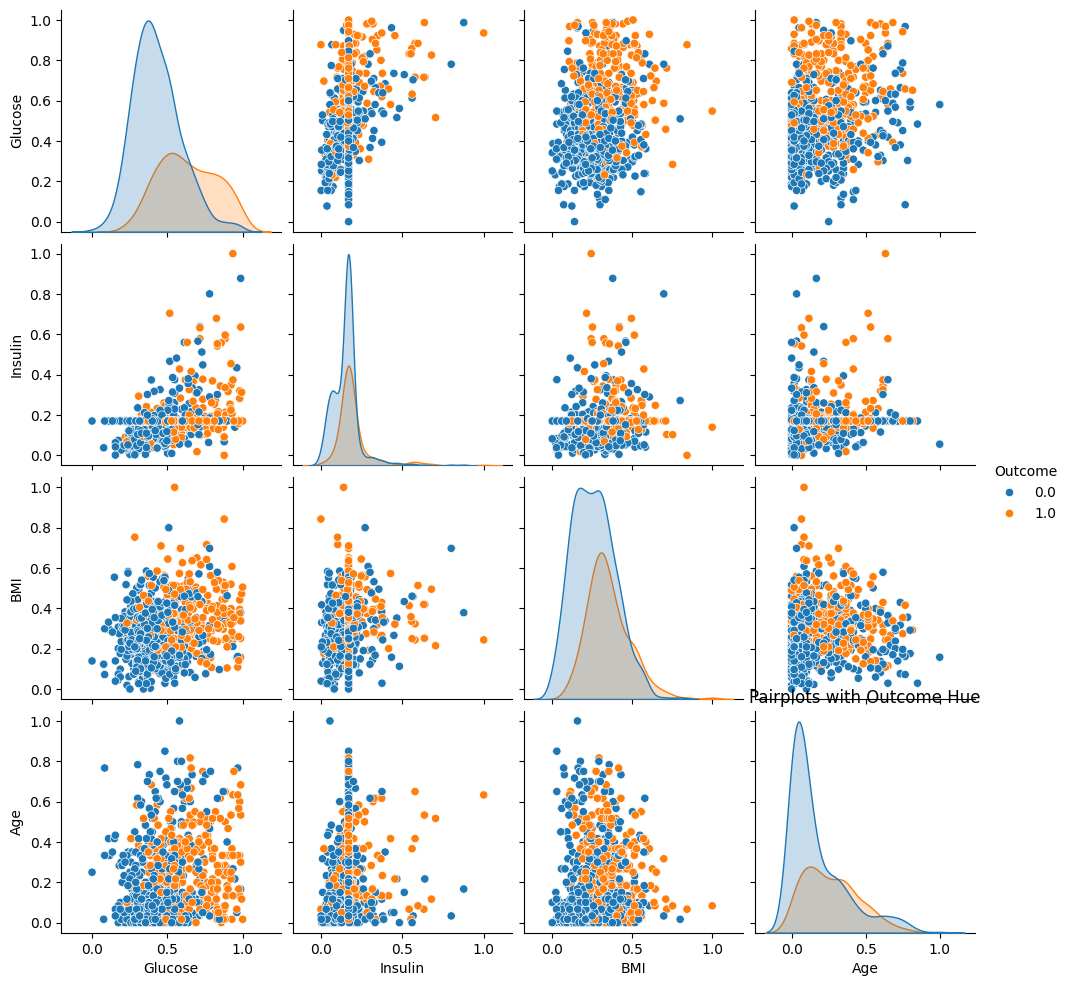

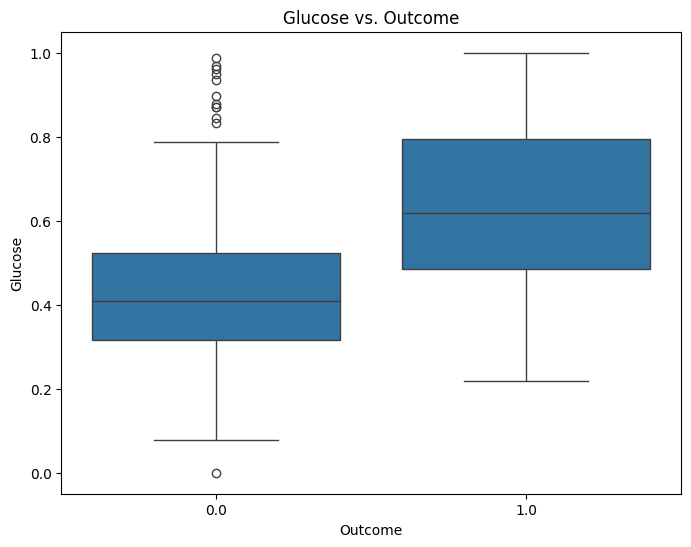

Data visualization complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(dataset):
    """Performs data visualization on the input dataset."""
    print("Starting data visualization...")

    # Histograms for numerical features
    dataset.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()

    # Box plots to detect outliers
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=dataset)
    plt.title("Box Plots for Outlier Detection")
    plt.show()

    # --- Target Variable Analysis ---
    sns.countplot(x='Outcome', data=dataset)
    plt.title("Outcome Distribution")
    plt.show()

    # --- Feature Relationships ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    # Pairplots
    sns.pairplot(data=dataset, hue='Outcome')
    plt.title("Pairplots with Outcome Hue")
    plt.show()

    # Feature vs. Outcome Visualization (example)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y='Glucose', data=dataset)
    plt.title("Glucose vs. Outcome")
    plt.show()

    print("Data visualization complete.")

# --- Main Execution (after loading and preprocessing) ---
file_path = 'diabetes.csv'
raw_data = load_data(file_path)
X, Y = preprocess_data(raw_data)

# Combine X and Y back into a DataFrame for visualization (if needed)
visualization_dataset = pd.concat([X, Y], axis=1)

# Call the visualization function
visualize_data(visualization_dataset)

# --- Data Splitting ---
# ... (rest of your data splitting and model training code)

# 3 Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def load_and_replace_zeros(file_path):
    """Loads the dataset and replaces 0 values in specified columns with NaN."""
    dataset = pd.read_csv(file_path)
    columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    dataset[columns_to_replace] = dataset[columns_to_replace].replace(0, np.nan)
    return dataset

def impute_missing_values(dataset):
    """Fills NaN values in specified columns with the median."""
    print("Filling NaN values with median...")
    for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
        dataset[column] = dataset[column].fillna(dataset[column].median())
    print("NaN values filled.")
    return dataset

def remove_outliers_iqr(df, column):
    """Removes outliers from a specified column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

def handle_outliers(dataset, column='Insulin'):
    """Handles outliers in the specified column using IQR."""
    print(f"Handling outliers (IQR for {column})...")
    dataset = remove_outliers_iqr(dataset, column)
    print("Outliers handled.")
    return dataset

def handle_class_imbalance_smote(X, y, random_state=42):
    """Handles class imbalance using SMOTE."""
    print("Handling class imbalance (SMOTE)...")
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("Class imbalance handled.")
    return X_resampled, y_resampled

def scale_data_minmax(X):
    """Scales the data using MinMaxScaler."""
    print("Scaling data (MinMaxScaler)...")
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    print("Data scaled.")
    return X_scaled, scaler # Return the scaler if you need it later for inverse transform

def split_data(X, y, test_size=0.20, val_size=0.25, random_state=42, stratify=None):
    """Splits the data into training, validation, and testing sets."""
    print("\nSplitting data into training, validation, and testing sets...")
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)
    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=val_size, random_state=random_state, stratify=y_train_temp) # Split training into train and validation
    print("Data split.")
    return X_train, X_val, X_test, y_train, y_val, y_test

def preprocess_data_pipeline(file_path, outlier_column='Insulin', test_size=0.20, random_state=42):
    """
    Orchestrates the data preprocessing pipeline.
    """
    print("Starting data preprocessing pipeline...")

    # Load data and replace zeros
    dataset = load_and_replace_zeros(file_path)

    # Impute missing values
    dataset = impute_missing_values(dataset)

    # Handle outliers
    dataset = handle_outliers(dataset, outlier_column)

    # Separate features and target before SMOTE
    X = dataset.drop('Outcome', axis=1)
    y = dataset['Outcome']

    # Handle class imbalance
    X_resampled, y_resampled = handle_class_imbalance_smote(X, y, random_state)

    # Scale the features
    X_resampled_scaled, scaler = scale_data_minmax(X_resampled)
    X_scaled_df = pd.DataFrame(X_resampled_scaled, columns=X.columns)

    # Split data into training, validation, and testing sets
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X_scaled_df, y_resampled, test_size=test_size, val_size=0.25, random_state=random_state, stratify=y_resampled)

    print("Data preprocessing pipeline completed.")
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

    # --- Main Execution (updated) ---
print("Starting...")

file_path = 'diabetes.csv'
X_train, X_val, X_test, Y_train, Y_val, Y_test, scaler = preprocess_data_pipeline(file_path)

print("\nShape of X after preprocessing and splitting:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

print("\nX_train head:")
print(pd.DataFrame(X_train).head())

print("\ny_train head:")
print(pd.Series(Y_train).head())

print("Ending...")

Starting...
Starting data preprocessing pipeline...
Filling NaN values with median...
NaN values filled.
Handling outliers (IQR for Insulin)...
Outliers handled.
Handling class imbalance (SMOTE)...
Class imbalance handled.
Scaling data (MinMaxScaler)...
Data scaled.

Splitting data into training, validation, and testing sets...
Data split.
Data preprocessing pipeline completed.

Shape of X after preprocessing and splitting:
X_train shape: (315, 8)
X_val shape: (105, 8)
X_test shape: (106, 8)
Y_train shape: (315,)
Y_val shape: (105,)
Y_test shape: (106,)

X_train head:
     Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
50      0.000000  0.367742       0.321429       0.219780  0.52381  0.130879   
249     0.294118  0.283871       0.476190       0.241758  0.52381  0.192229   
161     0.411765  0.400000       0.261905       0.175824  0.52381  0.169734   
178     0.411765  0.419355       0.500000       0.252747  0.52381  0.361963   
275     0.705882  0.258065    

#  4 Neural Network Training Function with Dropout and Early Stopping

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping  # Add this line here

def train_neural_network_with_dropout_early_stopping(X_train, y_train, X_val, y_val, save_path='models/model_diabetes_dropout_es.keras', epochs=100, dropout_rate=0.3, patience=10):
    """Defines, trains, and saves a simple neural network with Dropout and Early Stopping."""
    print("Starting Neural Network model training with Dropout and Early Stopping...")
    tf_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(12, input_dim=X_train.shape[1], activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    tf_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Define Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    tf_model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1,
                 validation_data=(X_val, y_val), callbacks=[early_stopping])

    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    tf_model.save(save_path)
    print(f"Neural Network model trained with Dropout and Early Stopping, saved to '{save_path}'")
    return tf_model

# 5 Main Execution



In [ ]:
# --- Main Execution ---
print("Starting...")

file_path = 'diabetes.csv'
dataset = load_and_replace_zeros(file_path)
dataset = impute_missing_values(dataset)
dataset = handle_outliers(dataset, 'Insulin')
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']
X_resampled, y_resampled = handle_class_imbalance_smote(X, y, random_state=42)
X_scaled_df, scaler = scale_data_minmax(X_resampled)

print("Shape of X_scaled_df before splitting:", X_scaled_df.shape)  # Added this line

# Save the scaler
import joblib
joblib.dump(scaler, '/content/scaler.joblib')
print("Scaler saved to /content/scaler.joblib")

# Split data into training, validation, and testing sets
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X_scaled_df, y_resampled, test_size=0.20, val_size=0.25, random_state=42, stratify=y_resampled)

# Train the neural network with Dropout and Early Stopping
model = train_neural_network_with_dropout_early_stopping(X_train, y_train, X_val, y_val)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nShape of X after preprocessing and splitting:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

print("\nX_train head:")
print(pd.DataFrame(X_train).head())

print("\ny_train head:")
print(pd.Series(y_train).head())

print("Ending...")

Starting...
Filling NaN values with median...
NaN values filled.
Handling outliers (IQR for Insulin)...
Outliers handled.
Handling class imbalance (SMOTE)...
Class imbalance handled.
Scaling data (MinMaxScaler)...
Data scaled.
Shape of X_scaled_df before splitting: (526, 8)
Scaler saved to /content/scaler.joblib

Splitting data into training, validation, and testing sets...
Data split.
Starting Neural Network model training with Dropout and Early Stopping...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5409 - loss: 0.6865 - val_accuracy: 0.5714 - val_loss: 0.6852
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5094 - loss: 0.6941 - val_accuracy: 0.5429 - val_loss: 0.6842
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4411 - loss: 0.6970 - val_accuracy: 0.5714 - val_loss: 0.6838
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5475 - loss: 0.6831 - val_accuracy: 0.5619 - val_loss: 0.6827
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5690 - loss: 0.6830 - val_accuracy: 0.5714 - val_loss: 0.6813
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4800 - loss: 0.6896 - val_accuracy: 0.6190 - val_loss: 0.6797
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5147 - loss: 0.6895 - val_accuracy: 0.6190 - val_loss: 0.6780
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5161 - loss: 0.6841 - val_accuracy: 0.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already trained your model and made predictions:
# model.fit(X_train, Y_train)
# y_pred = model.predict(X_test)
# y_pred_proba = model.predict_proba(X_test)[:, 1] # For ROC AUC

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.6981
Precision: 0.6981
Recall: 0.6981
F1-Score: 0.6981
ROC AUC Score: 0.8156


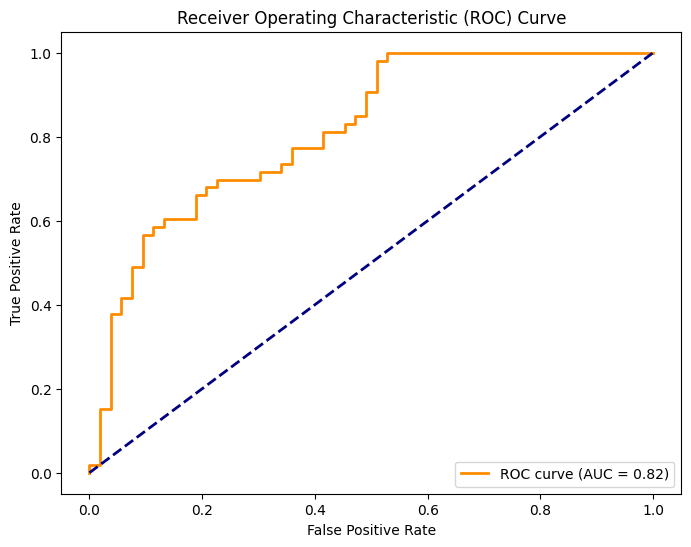

AUC Score: 0.82


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.2f}')

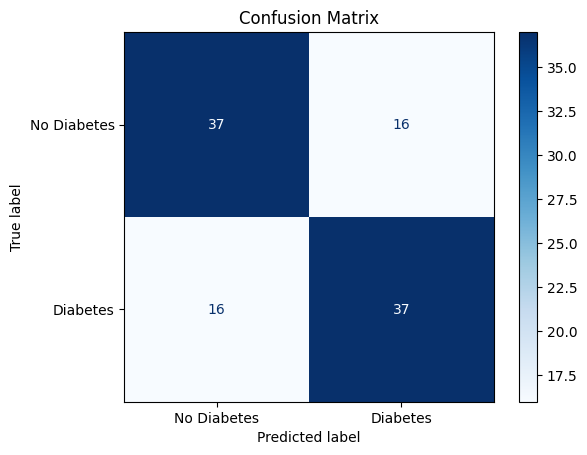

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 6 Evaluate model

In [ ]:
def evaluate_models(X_test, Y_test):
    # Your code to evaluate the models goes here
    print("Evaluating models...")
    # ...

In [ ]:
# Import the predict_diabetes function
from app import predict_diabetes

print("Shape of X_test:", X_test.shape)  # Insert this line here

# Select a few sample data points from X_test (using DataFrame's head method)
sample_data = X_test[:3].tolist()

# Make predictions for the sample data
print("\nDemonstrating Predictions using the predict_diabetes function:")
for features in sample_data:
    prediction, probability = predict_diabetes(features)
    print(f"Features: {features}")
    print(f"Predicted class (0: No Diabetes, 1: Diabetes): {prediction}")
    print(f"Predicted probability: {probability:.4f}")

Shape of X_test: (106, 8)

Demonstrating Predictions using the predict_diabetes function:
Model loaded: True, Scaler loaded: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Features: [0.23529411764705882, 0.3548387096774193, 0.3571428571428572, 0.32967032967032966, 0.5238095238095237, 0.29856850715746425, 0.03691460055096419, 0.23529411764705888]
Predicted class (0: No Diabetes, 1: Diabetes): 0
Predicted probability: 0.4505
Model loaded: True, Scaler loaded: True


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Features: [0.058823529411764705, 0.3161290322580645, 0.38095238095238093, 0.25274725274725274, 0.5238095238095237, 0.24948875255623731, 0.1305785123966942, 0.03921568627450983]
Predicted class (0: No Diabetes, 1: Diabetes): 0
Predicted probability: 0.4634
Model loaded: True, Scaler loaded: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Features: [0.3529411764705882, 0.23225806451612901, 0.33333333333333337, 0.2417582417582418, 0.5238095238095237, 0.16359918200409002, 0.12947658402203857, 0.3921568627450981]
Predicted class (0: No Diabetes, 1: Diabetes): 0
Predicted probability: 0.4642


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
